In [120]:
import numpy as np
import pandas as pd

In [121]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow import keras
from keras import layers

In [122]:
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [123]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [124]:
print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [125]:
model=Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(Dropout(0.5))
#model.add(Dense(250))
model.add(Dense(10,activation='softmax'))

In [126]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [127]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [128]:
model.fit(x_train,y_train,epochs=15,batch_size=128,validation_split=.1)

Epoch 1/15
422/422 [==============================] - 9s 20ms/step - loss: 0.3623 - accuracy: 0.8896 - val_loss: 0.0798 - val_accuracy: 0.9787
Epoch 2/15
422/422 [==============================] - 8s 20ms/step - loss: 0.1104 - accuracy: 0.9658 - val_loss: 0.0576 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0862 - accuracy: 0.9734 - val_loss: 0.0490 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0713 - accuracy: 0.9789 - val_loss: 0.0439 - val_accuracy: 0.9872
Epoch 5/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0618 - accuracy: 0.9809 - val_loss: 0.0395 - val_accuracy: 0.9885
Epoch 6/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.0402 - val_accuracy: 0.9895
Epoch 7/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0357 - val_accuracy: 0.9897

In [129]:
score=model.evaluate(x_test,y_test,verbose=0)

In [130]:
score

[0.027682535350322723, 0.9905999898910522]

In [131]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [132]:
l=[]
for i in model.predict(x_test):
    l.append(np.argmax(i))

313/313 [==============================] - 1s 2ms/step


In [133]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

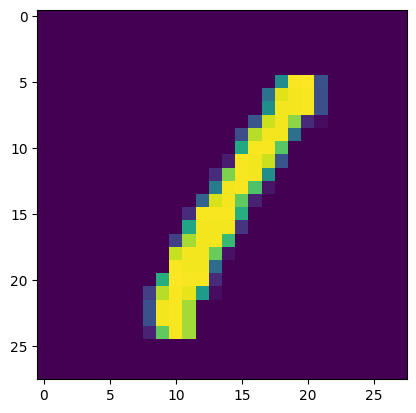

In [26]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3])

plt.savefig('')

In [134]:
import imageio
img=imageio.imread('test1.jpg')

C:\Users\Bhavesh Kumar B\AppData\Local\Temp\ipykernel_17060\3589939409.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imageio.imread('test1.jpg')


In [135]:
img=img/255.0

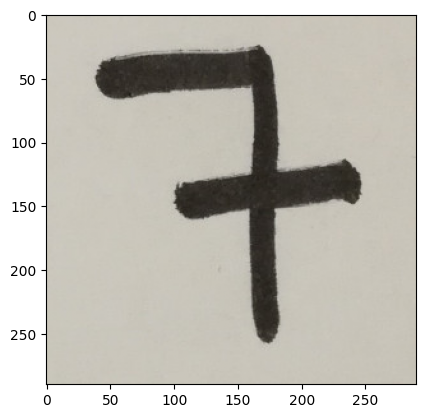

In [136]:
plt.imshow(img)

In [137]:
import cv2

img = cv2.convertScaleAbs(img)
resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)

gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

reshaped_img = gray_img.reshape((28, 28, 1))



In [138]:
np.argmax(model.predict(reshaped_img.reshape(1,28,28,1)))

1/1 [==============================] - 0s 33ms/step


8

In [139]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

import pickle
pickle.dump(model,open("model2.pkl",'wb'))

x_train shape: (60000, 28, 28, 1)
Epoch 1/15
422/422 [==============================] - 9s 20ms/step - loss: 0.3710 - accuracy: 0.8866 - val_loss: 0.0780 - val_accuracy: 0.9797
Epoch 2/15
422/422 [==============================] - 9s 20ms/step - loss: 0.1121 - accuracy: 0.9657 - val_loss: 0.0556 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0828 - accuracy: 0.9748 - val_loss: 0.0457 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 8s 20ms/step - loss: 0.0620 - accuracy: 0.9803 - val_loss: 0.0369 - val_accuracy: 0.9905
Epoch 6/15
422/422 [==============================] - 9s 20ms/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0382 - val_accuracy: 0.9908
Epoch 7/15
422/422 [==============================] - 9s 20ms/step - loss: 0.0512 - accuracy: 0.9836 - val_l